<div style="padding-right: 100px;">
<img src="sample_store.png" width="800" height="100">
</div>

# Introduction

In this analysis, I will explore the sample store dataset from https://www.kaggle.com/code/filizesenkaya/sample-store on Kaggle  , a well-known dataset for data analysis. This dataset contains a wide range of features, including order ID, country, region, price, quantity, discount, profit, and many others. I have selected a subset of 100 records from the dataset and will perform various data analysis tasks to gain insights into the data.

# Problem Statement

This analysis seeks to pinpoint the underlying causes of recent financial losses by spotting which year, category and sub-categoryof product had the most lost and also develop strategies to address them while safeguarding customer satisfaction and the company's long-term sustainability.

# 📚Imports

In [1]:
#Import necessary libraries

import pandas as pd #for processing, I/O,etc
#For visualization
import matplotlib.pyplot as plt
import seaborn as sns

#To silent warnings
import warnings
warnings.filterwarnings("ignore")

# 🧾Data Loading

In [2]:
#Load the ddatset to a dataframe
df = pd.read_csv("sample_store.csv")

In [3]:
#Display the first five rows

df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
#Display the last five rows

df.tail()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
95,US-2017-109484,2017-11-06,2017-11-12,Standard Class,RB-19705,Roger Barcio,Home Office,United States,Portland,Oregon,97206,West,OFF-BI-10004738,Office Supplies,Binders,Flexible Leather- Look Classic Collection Ring...,5.682,1,0.7,-3.7880
96,CA-2017-161018,2017-11-09,2017-11-11,Second Class,PN-18775,Parhena Norris,Home Office,United States,New York City,New York,10009,East,FUR-FU-10000629,Furniture,Furnishings,9-3/4 Diameter Round Wall Clock,96.530,7,0.0,40.5426
97,CA-2017-157833,2017-06-17,2017-06-20,First Class,KD-16345,Katherine Ducich,Consumer,United States,San Francisco,California,94122,West,OFF-BI-10001721,Office Supplies,Binders,Trimflex Flexible Post Binders,51.312,3,0.2,17.9592
98,CA-2016-149223,2016-09-06,2016-09-11,Standard Class,ER-13855,Elpida Rittenbach,Corporate,United States,Saint Paul,Minnesota,55106,Central,OFF-AP-10000358,Office Supplies,Appliances,Fellowes Basic Home/Office Series Surge Protec...,77.880,6,0.0,22.5852
99,CA-2016-158568,2016-08-29,2016-09-02,Standard Class,RB-19465,Rick Bensley,Home Office,United States,Chicago,Illinois,60610,Central,OFF-PA-10003256,Office Supplies,Paper,Avery Personal Creations Heavyweight Cards,64.624,7,0.2,22.6184


In [5]:
#Summarized statistical information about our data

df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,100.000000,100.000000,100.00000,100.00000,100.000000
mean,57488.280000,215.045317,3.74000,0.15570,-1.018907
std,29372.579485,428.266851,2.05785,0.20794,181.813419
min,10009.000000,1.248000,1.00000,0.00000,-1665.052200
25%,32002.000000,18.243000,2.00000,0.00000,2.672100
50%,58220.500000,62.482000,3.00000,0.15000,8.120700
75%,90004.000000,202.778000,5.00000,0.20000,20.411750
max,98103.000000,3083.430000,9.00000,0.80000,298.685500


# 🧐Data Inspection

## Variable Descriptions

1. **Order ID**: A unique identifier for each order.
2. **Order Date**: The date when the order was placed.
3. **Ship Date**: The date when the order was shipped.
4. **Ship Mode**: The shipping method used for the order (e.g., standard, second and first class).
5. **Customer ID**: A unique identifier for each customer.
6. **Customer Name**: The name of the customer who placed the order.
7. **Segment**: The market segment to which the customer belongs (e.g., corporate, consumer).
8. **Country**: The country where the order was placed.
9. **City**: The city where the order was delivered.
10. **State**: The state or region within the country.
11. **Postal Code**: The postal code for the delivery address.
12. **Region**: The geographical region within the country.
13. **Product ID**: A unique identifier for each product.
14. **Category**: The broad category to which the product belongs (e.g., office supplies, technology).
15. **Sub-Category**: A more specific sub-category within the product category (e.g., binders, appliances).
16. **Product Name**: The name or description of the product.
17. **Sales**: The total sales revenue generated by the order.
18. **Quantity**: The number of units of the product ordered.
19. **Discount**: The discount applied to the order.
20. **Profit**: The profit or earnings associated with the order after accounting for costs.

In [6]:
#Displaying the columns

df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [7]:
#Check for null values

df.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
#Display the total number of rows and columns present

df.shape

(100, 20)

In [9]:
#Check for duplicates

df.duplicated().sum()

0

In [10]:
#Summarized information of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       100 non-null    object 
 1   Order Date     100 non-null    object 
 2   Ship Date      100 non-null    object 
 3   Ship Mode      100 non-null    object 
 4   Customer ID    100 non-null    object 
 5   Customer Name  100 non-null    object 
 6   Segment        100 non-null    object 
 7   Country        100 non-null    object 
 8   City           100 non-null    object 
 9   State          100 non-null    object 
 10  Postal Code    100 non-null    int64  
 11  Region         100 non-null    object 
 12  Product ID     100 non-null    object 
 13  Category       100 non-null    object 
 14  Sub-Category   100 non-null    object 
 15  Product Name   100 non-null    object 
 16  Sales          100 non-null    float64
 17  Quantity       100 non-null    int64  
 18  Discount   

Upon examining the dataset, we observe 100 rows and 20 columns, free from duplicates or null values. To facilitate subsequent analysis, renaming the columns would enhance clarity and data access.

# 🧽Data Cleaning

In [11]:
#The columns to be used

new_columns = ['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'country', 'city', 'state', 'postal_code',
       'region', 'product_id', 'category', 'sub_category', 'product_name',
       'sales', 'quantity', 'discount', 'profit']

In [12]:
#Change the columns to the new one

df.columns = new_columns

In [13]:
#Function to generate year
def get_year(date):
    split = date.split("-")
    return split[0]

In [14]:
#apply function on the order date column

df["year"]=df["order_date"].apply(get_year)

In [15]:
#Display the year series

df["year"]

0     2016
1     2016
2     2016
3     2015
4     2015
      ... 
95    2017
96    2017
97    2017
98    2016
99    2016
Name: year, Length: 100, dtype: object

In [16]:
#Group the data by each year

df_year = df.groupby('year').sum()

In [17]:
df.groupby('year').sum()

,postal_code,sales,quantity,discount,profit
year,,,,,
2014,1534313,6228.9860,82,2.20,528.6226
2015,1662516,8645.2797,125,7.27,-1765.5357
2016,1650973,5501.8300,122,2.30,1042.0783
2017,901026,1128.4360,45,3.80,92.9441


In [18]:
df['year'].unique()

array(['2016', '2015', '2014', '2017'], dtype=object)

# 🔍Exploratory Data Analysis (EDA)

Let's delve into the historical sales data, including sales figures, quantity sold, discounts offered, and profits generated, to uncover any underlying trends or patterns that may exist.

In [19]:
# A function for barplots
def barplot(x,y,xlabel,ylabel,title,filename):
    sns.set()
    plt.figure(figsize=(10,6))
    sns.barplot(x=x,y=y)
    plt.xlabel(xlabel,fontweight='bold')
    plt.ylabel(ylabel,fontweight='bold')
    plt.title(title,fontweight='bold')
    plt.xticks(rotation=45)
    plt.savefig(filename)
    plt.show()

In [20]:
# A function for barplots
def lineplot(x,y,xlabel,ylabel,title,filename):
    sns.set()
    plt.figure(figsize=(10,6))
    sns.lineplot(x=x,y=y,marker='o')
    plt.xlabel(xlabel,fontweight='bold')
    plt.ylabel(ylabel,fontweight='bold')
    plt.title(title,fontweight='bold')
    plt.savefig(filename)
    plt.show()

With the evident visibility of sales figures, profit margins, discounts granted, and the quantity of goods sold across the years, let's delve into the data to pinpoint the year that generated the peak profits.

## Identifying the Peak Profit Year

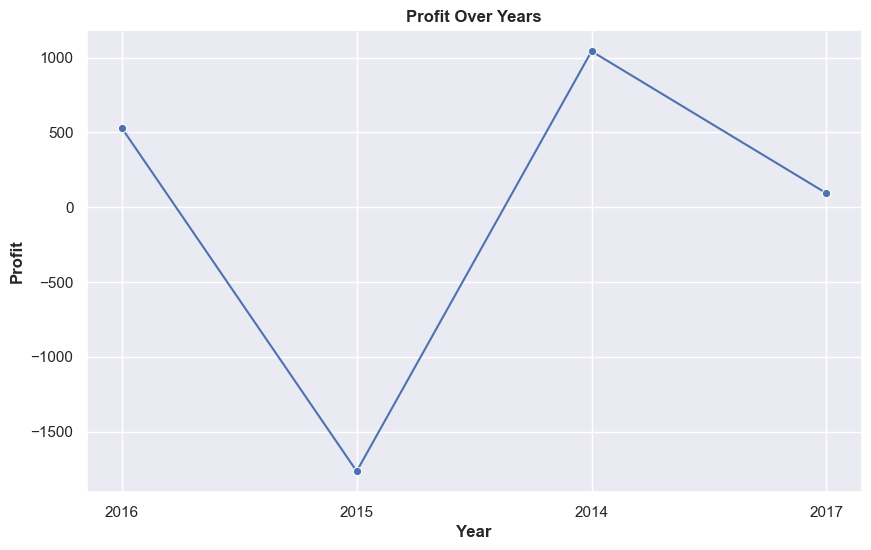

In [21]:
#Call the barplots

lineplot(df["year"].unique(),df_year["profit"],"Year","Profit","Profit Over Years","profit_over_years.png")

As you observed, the plot clearly indicates that 2014 was the peak profit year, while 2015 experienced a significant loss. This remarkable reversal poses an intriguing question: what could have caused such a dramatic shift in profitability? To delve into the underlying reasons, let's conduct a deeper analysis of the sales, quantity sold, and discounts for 2015.

## Understanding the Factors Behind the Losses in 2015

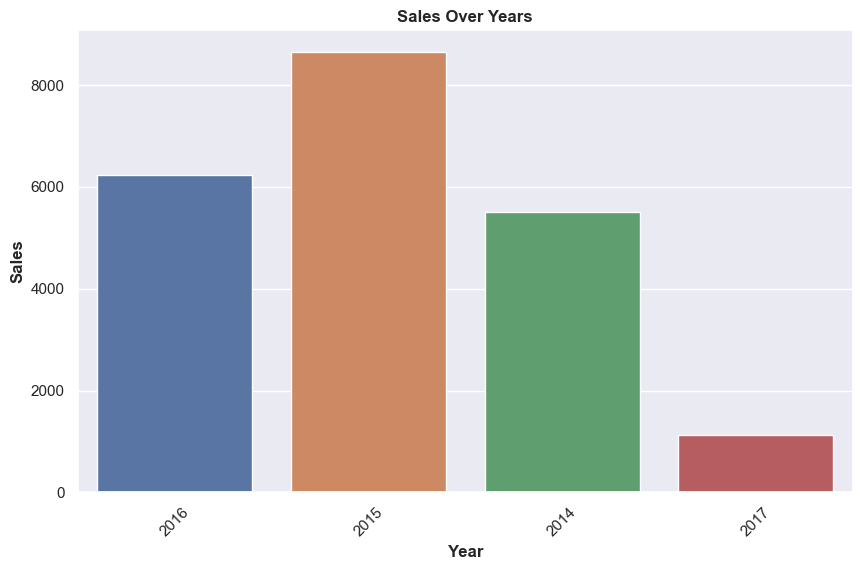

In [22]:
barplot(df["year"].unique(),df_year["sales"],"Year","Sales","Sales Over Years","sales_over_years.png")

Our meticulous examination of the sales data reveals an intriguing pattern i.e, the highest sales volume was recorded in 2015. 

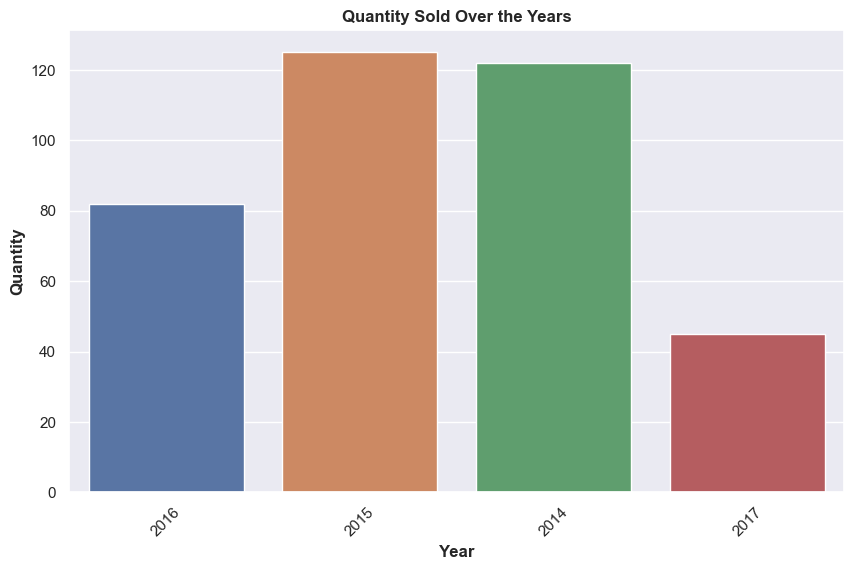

In [23]:
barplot(df["year"].unique(),df_year["quantity"],"Year","Quantity","Quantity Sold Over the Years","quant_sold_over_years.png")

A thorough examination of the sales data reveals an intriguing phenomenon: the year 2015 witnessed both the highest quantity sold and the highest sales volume. This seemingly contradictory pattern begs the question: Could the discounts offered on products have been the underlying cause for this unexpected outcome?

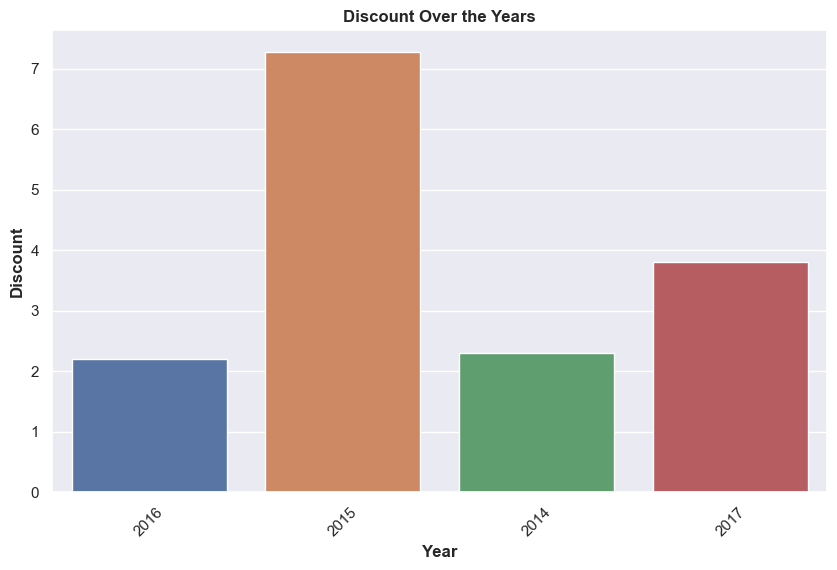

In [24]:
barplot(df["year"].unique(),df_year["discount"],"Year","Discount","Discount Over the Years","discount_over_years.png")

Even though 2015 had the highest sales, quantity of goods sold, and discount rate, it resulted in a significant loss. One possible explanation is that the quantity of goods sold exceeded the inventory level, leading to stockouts or additional costs for fulfilling orders. However, we cannot confirm this without having access to data on inventory levels. Another possibility is that the cost of goods sold (COGS) was higher than the sales amount, resulting in a loss. However, we also cannot confirm this without having access to COGS data. While discounts can increase sales, they can also eat into profits. Therefore, it is likely that the discounts offered in 2015 played a role in the losses incurred that year.

To determine which sub_category or product were responsible for the losses, we can look at the discount rate for each category for the year 2015.

## Unraveling the Mystery of 2015 Losses

In [25]:
#transactions for the year 2015

df15 = df[df["year"] == str(2015)]

In [26]:
#grouping by category of goods

cat_df15 = df15.groupby("category").sum()

In [27]:
cat_df15

,postal_code,sales,quantity,discount,profit
category,,,,,
Furniture,686269,7325.6357,49,2.47,-1923.8943
Office Supplies,809202,934.4960,70,4.60,110.4510
Technology,167045,385.1480,6,0.20,47.9076


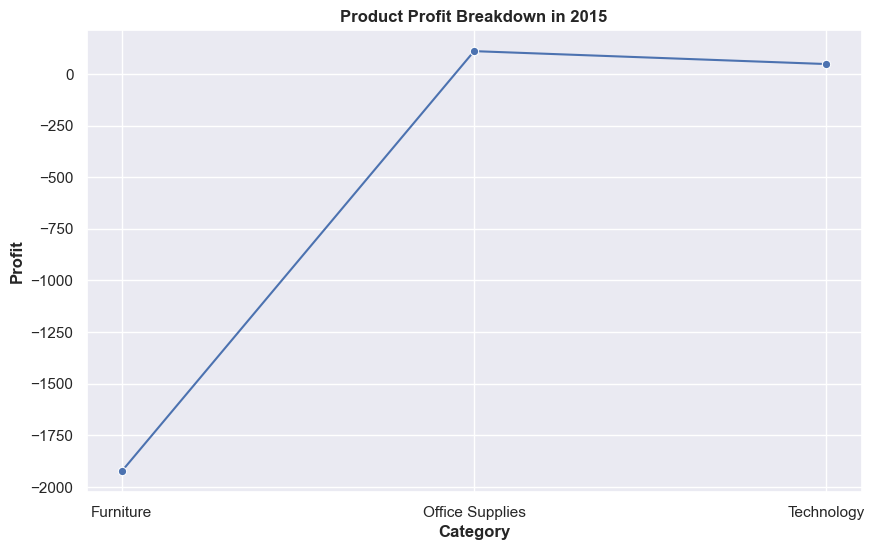

In [28]:
lineplot(df["category"].unique(),cat_df15["profit"],"Category","Profit","Product Profit Breakdown in 2015","CategoryProfit_for_2015.png")

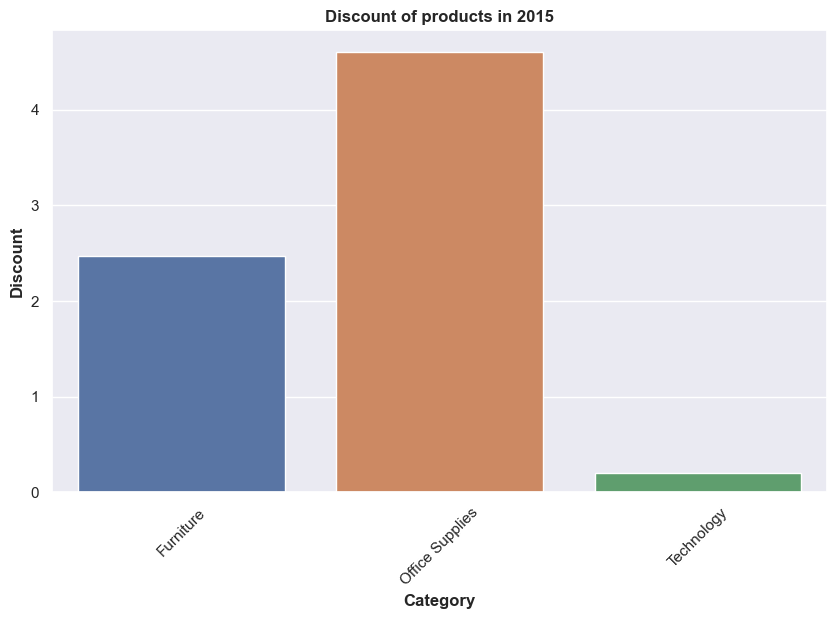

In [29]:
barplot(df["category"].unique(),cat_df15["discount"],"Category","Discount","Discount of products in 2015","CategoryDiscount_for_2015.png")

Our analysis has revealed that the furniture subcategory incurred the most losses in 2015. To further investigate the reasons behind these losses, let's delve into the data and identify the specific subcategories that contributed most significantly to the overall losses.

In [30]:
# Furniture dataset for 2015

df15furn = df15[df15['category']=="Furniture"]

In [31]:
#Display random sample

df15furn.sample(5)

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,...,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,year
38,CA-2015-117415,2015-12-27,2015-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,Texas,...,Central,FUR-BO-10002545,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",532.3992,3,0.32,-46.9764,2015
72,US-2015-134026,2015-04-26,2015-05-02,Standard Class,JE-15745,Joel Eaton,Consumer,United States,Memphis,Tennessee,...,South,FUR-CH-10000513,Furniture,Chairs,High-Back Leather Manager's Chair,831.9360,8,0.20,-114.3912,2015
73,US-2015-134026,2015-04-26,2015-05-02,Standard Class,JE-15745,Joel Eaton,Consumer,United States,Memphis,Tennessee,...,South,FUR-FU-10003708,Furniture,Furnishings,Tenex Traditional Chairmats for Medium Pile Ca...,97.0400,2,0.20,1.2130,2015
29,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,...,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250,2015
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015


In [32]:
#group by sub category

sub_cat15 = df15furn.groupby('sub_category').sum()
sub_cat15

,postal_code,sales,quantity,discount,profit
sub_category,,,,,
Bookcases,96181,3615.8292,10,0.82,-1712.0286
Chairs,222910,1347.0990,17,0.80,-127.6626
Furnishings,249810,360.5000,14,0.40,58.5630
Tables,117368,2002.2075,8,0.45,-142.7661


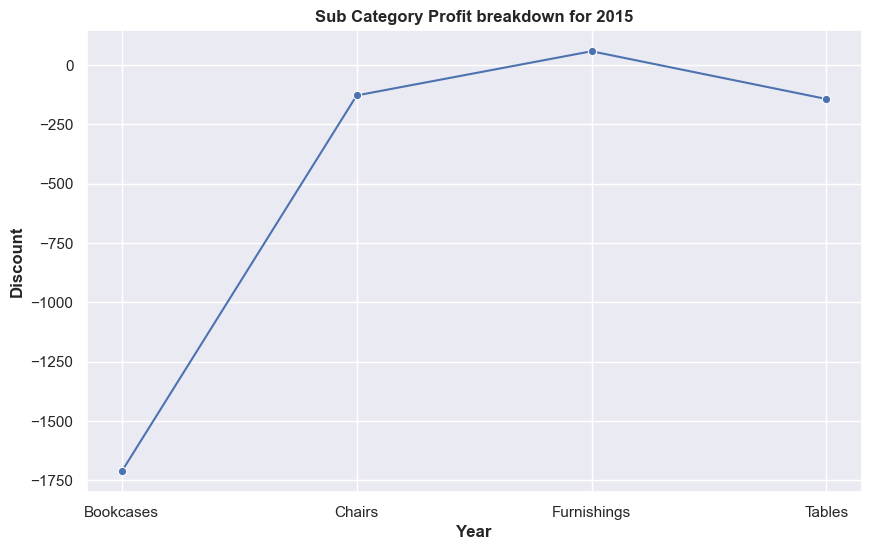

In [33]:
#Call the lineplot and plot the profit for subcategory in 2015

lineplot(["Bookcases","Chairs","Furnishings","Tables"],sub_cat15["profit"],"Year","Discount","Sub Category Profit breakdown for 2015","SubCategoryProfit_for_2015.png")

In [34]:
#Sub category under furniture

y = df15furn.sub_category.value_counts()
y

Furnishings    5
Chairs         4
Tables         2
Bookcases      2
Name: sub_category, dtype: int64

In [35]:
my_explode = [0,0,0,0.1]

In [36]:
mylabel = df15furn.sub_category.value_counts().keys()
mylabel

Index(['Furnishings', 'Chairs', 'Tables', 'Bookcases'], dtype='object')

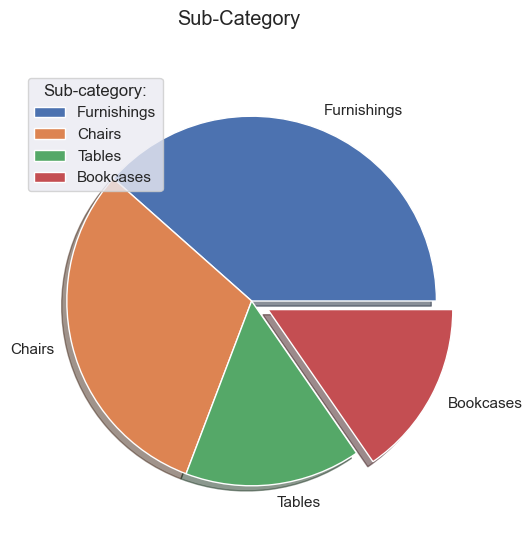

In [37]:
plt.figure(figsize=(10,6))
plt.pie(y,labels = mylabel,explode = my_explode, shadow=True)
plt.legend(title = "Sub-category:",loc="upper left")
plt.suptitle("Sub-Category")
plt.savefig("Furniure_SubCategory_2015.png")
plt.show()

Although it is clear that furniture, most specifically the bookcases incurred the most losses in 2015 but doesn't have the highest discount rate which means the discount rate is not the only factor responsible because Office supplies, which had a discount rate that was twice as high as furniture, was still profitable.

Other factors that may have contributed to the losses in 2015 which may include the mode of transportation and the customer segment. Different modes of transportation have different costs, and different customer segments may have different discount rates.

### Unveiling the Puzzle of Furniture Losses in 2015: Exploring Transportation, Customer Segments, and Other Factors

In [38]:
bookcases_df15 = df15furn[df15furn.sub_category=="Bookcases"]
bookcases_df15.iloc[:,9:]

,state,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,year
27,Pennsylvania,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522,2015
38,Texas,77041,Central,FUR-BO-10002545,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",532.3992,3,0.32,-46.9764,2015


In [39]:
#Generate a dictonary

data = {
    "state":[bookcases_df15.iloc[0,9],bookcases_df15.iloc[0,9],
            bookcases_df15.iloc[1,9],bookcases_df15.iloc[1,9]],
    "quan_dis":["quantity","discount",
               "quantity","discount"],
    "qd_value":[bookcases_df15.iloc[0,17],bookcases_df15.iloc[0,18],
            bookcases_df15.iloc[1,17],bookcases_df15.iloc[1,18]],
    "sal_prof":["sales","profit",
                "sales","profit"],
    "sp_value":[bookcases_df15.iloc[0,16],bookcases_df15.iloc[0,19],
            bookcases_df15.iloc[1,16],bookcases_df15.iloc[1,19]]
}

In [40]:
#Convert to a dataframe

bookcases_df = pd.DataFrame(data)
bookcases_df

,state,quan_dis,qd_value,sal_prof,sp_value
0,Pennsylvania,quantity,7.00,sales,3083.4300
1,Pennsylvania,discount,0.50,profit,-1665.0522
2,Texas,quantity,3.00,sales,532.3992
3,Texas,discount,0.32,profit,-46.9764


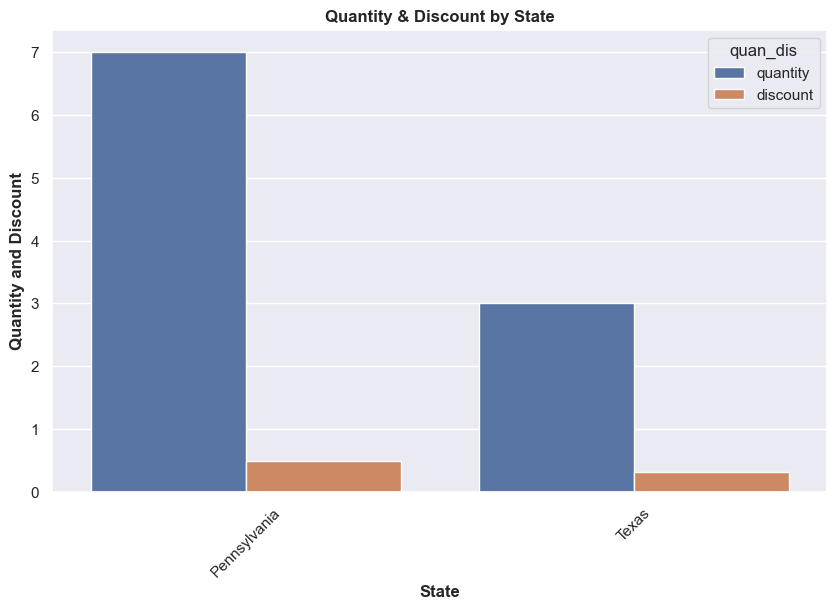

In [41]:
sns.set()
plt.figure(figsize=(10,6))
sns.barplot(data = bookcases_df,x = "state",y="qd_value",hue = "quan_dis")
plt.xlabel("State",fontweight='bold')
plt.ylabel("Quantity and Discount",fontweight='bold')
plt.title("Quantity & Discount by State",fontweight='bold')
plt.xticks(rotation=45)
plt.savefig("Bookcases_2015_quanDis.png")
plt.show()

A closer examination of the data reveals that a greater quantity of bookcases were sold to Pennsylvania at a higher discount compared to Texas. This observation raises intriguing questions about the factors influencing sales and profit margins in these two states. Let's delve into the data and visualize the sales and profit trends for bookcases in Pennsylvania and Texas.

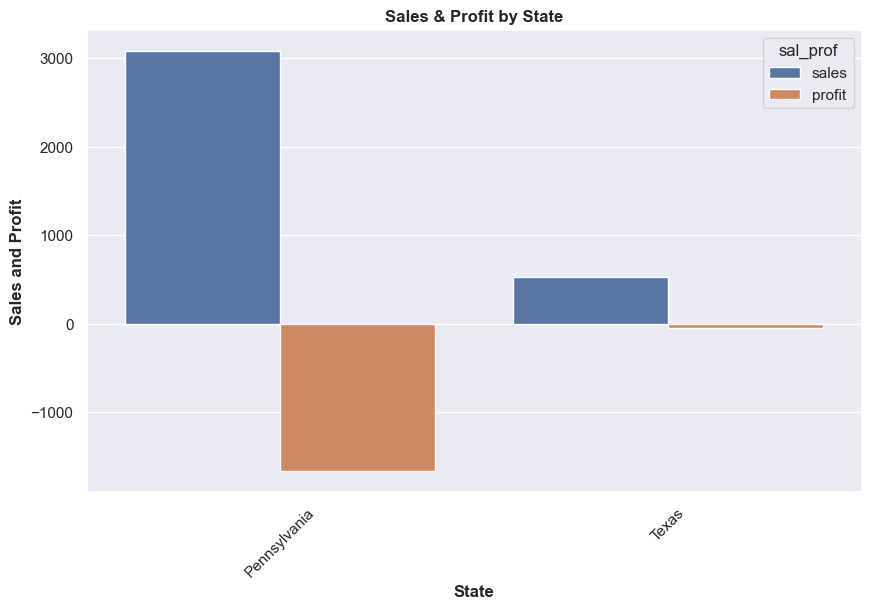

In [42]:
sns.set()
plt.figure(figsize=(10,6))
sns.barplot(data = bookcases_df,x = "state",y="sp_value",hue = "sal_prof")
plt.xlabel("State",fontweight='bold')
plt.ylabel("Sales and Profit",fontweight='bold')
plt.title("Sales & Profit by State",fontweight='bold')
plt.xticks(rotation=45)
plt.savefig("Bookcases_2015_salesProfit.png")
plt.show()

Despite the high prices of bookcases sold to Pennsylvania, these sales resulted in a considerable loss for the company, this leads us to the following inference:

## Inference

* **High discounts** were a significant factor in the losses, particularly for Customer 1, who received a 50% discount.

* **Customer 1's larger purchase quantity** amplified the impact of the discount, leading to a more substantial loss.

* **The "Consumer" segment** may be more price-sensitive than the "Home Office" segment, suggesting that discounts should be tailored to different customer groups.

* **Geographical factors** such as shipping costs, taxes, and market dynamics could also be playing a role in the losses.

To address these issues, the company should consider the following actions:

* **Reevaluate pricing strategy:** Moderate discounts and tiered pricing for bulk purchases could improve profit margins.

* **Segment-specific pricing:** Differentiate pricing for the "Consumer" segment to avoid excessive discounts.

* **Quantity-based discounts:** Optimize quantity discounts to encourage bulk purchases without compromising profitability.

* **Review shipping costs:** Ensure shipping costs are not eroding profitability and explore cost-effective shipping options.

* **Consider geographic variations:** Adjust pricing, taxes, and marketing strategies based on regional factors.

* **Educate customers:** Communicate the value of products and savings from quantity purchases to offset the perception of high discounts.


# Conclusion

By implementing these measures, the company can work towards mitigating losses and improving overall profitability, while also remembering that the goal is to continually attract customers while also striking a balance in maintaining profitability.